In [8]:
import pandas as pd

# Load dataset
data_8mer = pd.read_csv('Dataset/csv/PAD4C8BoLA.csv')
data_9mer = pd.read_csv('Dataset/csv/PAD4C9BoLA.csv')


### One Hot Encode ###

In [87]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example one-hot encoding for a peptide sequence
def one_hot_encode(sequence, amino_acids):
    encoder = OneHotEncoder(categories=[list(amino_acids)], sparse_output=False)
    # Reshape the sequence to have one feature per amino acid
    sequence_reshaped = np.array(list(sequence)).reshape(-1, 1)
    return encoder.fit_transform(sequence_reshaped)

amino_acids = 'ACDEFGHIKLMNPQRSTVWY'  # 20 standard amino acids
peptide = 'ACDEFGHIK'  # Example peptide sequence
encoded_peptide = one_hot_encode(peptide, amino_acids)

print(encoded_peptide)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [88]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example padding
max_length = 9  # Set this according to your max peptide length
padded_sequences = pad_sequences(encoded_peptide, maxlen=max_length, padding='post')


### Splitting data ###

In [77]:
import pandas as pd

# Load dataset
data_8mer = pd.read_csv('Dataset/csv/PAD4C8BoLA.csv')
data_9mer = pd.read_csv('Dataset/csv/PAD4C9BoLA.csv')

# Combine datasets if necessary
data = pd.concat([data_8mer, data_9mer], ignore_index=True)


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function for one-hot encoding
def one_hot_encode(sequence, amino_acids):
    encoder = OneHotEncoder(categories=[list(amino_acids)], sparse_output=False)
    sequence_reshaped = np.array(list(sequence)).reshape(-1, 1)
    return encoder.fit_transform(sequence_reshaped)

# Load datasets
data_8mer = pd.read_csv('Dataset/csv/PAD4C8BoLA.csv')
data_9mer = pd.read_csv('Dataset/csv/PAD4C9BoLA.csv')

# Combine datasets
data = pd.concat([data_8mer, data_9mer], ignore_index=True)

# Extract peptide sequences
peptide_sequences = data['Peptide'].values  # Adjust 'Peptide' to match your column name

# One-hot encode all peptide sequences
encoded_peptides = [one_hot_encode(seq, amino_acids) for seq in peptide_sequences]

# Determine the maximum sequence length
max_length = max(len(seq) for seq in peptide_sequences)

# Pad sequences to have the same length
padded_sequences = pad_sequences(encoded_peptides, maxlen=max_length, padding='post', dtype='float32')

# Convert to numpy array
padded_sequences = np.array(padded_sequences)

# Extract labels (e.g., 'EL_score' or 'BA_score')
labels = data['EL-score'].values  # Adjust to the column name in your dataset

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


### Build model ###

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(max_length, len(amino_acids)), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))  # For regression; adjust for classification
model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust loss function if classification


/Users/user/Downloads/Anthrax Project/myenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
Training = model.fit(X_train, y_train, epochs=80, validation_data=(X_val, y_val))


Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0018 - val_loss: 2.2324e-04
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 2.3983e-04
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 2.3721e-04
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6596e-04 - val_loss: 1.5515e-04
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 - val_loss: 2.1633e-04
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 2.3309e-04
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.1174e-04 - val_loss: 3.0924e-04
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5443e-04 - val_loss: 2.3891e-04
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0948e-04 - val_loss: 3.6334e-04
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5446e-04 - val_loss: 2.5889e-04
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9910e-04 - val_loss: 3.1196e-04
Epoch 12/80
7/7 ━━━━━━━━

In [81]:
loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6743e-04 
Validation Loss: 0.0002530955243855715


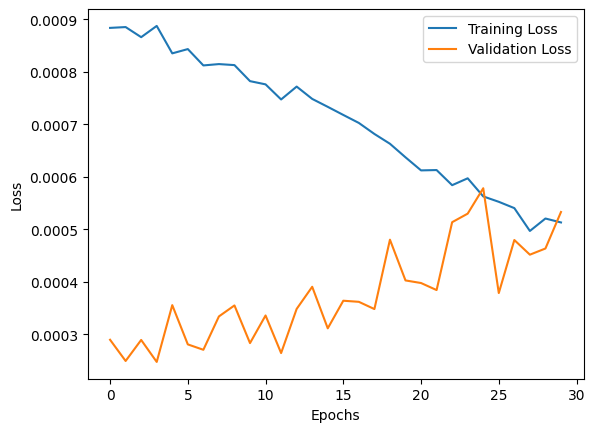

In [82]:
import matplotlib.pyplot as plt

# After training, plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Peptide Mutation Scoring ##

### Cara 1 ###

In [83]:
def integrate_mutated_peptide(protein_sequence, peptide, mutation_start):
    return protein_sequence[:mutation_start] + peptide + protein_sequence[mutation_start + len(peptide):]

# Misal urutan protein lengkap
full_protein = "MKTAYIAKQRQISFVKSHFSRQDILDLWIYHTQGYFPDWQNYQIGSKETLYAQKFQGQTLAL"

# Peptida yang telah dimutasi
mutated_peptide = "ACDEFGHIK"

# Posisi mutasi, misalnya pada posisi ke-10
mutation_start = 10

# Integrasi peptida yang dimutasi
mutated_protein = integrate_mutated_peptide(full_protein, mutated_peptide, mutation_start)

print("Original Full-Length Protein: ", full_protein)
print("Mutated Peptide: ", mutated_peptide)
print("Full-Length Protein with Mutated Peptide: ", mutated_protein)


Original Full-Length Protein:  MKTAYIAKQRQISFVKSHFSRQDILDLWIYHTQGYFPDWQNYQIGSKETLYAQKFQGQTLAL
Mutated Peptide:  ACDEFGHIK
Full-Length Protein with Mutated Peptide:  MKTAYIAKQRACDEFGHIKSRQDILDLWIYHTQGYFPDWQNYQIGSKETLYAQKFQGQTLAL


### Cara 2 ###

In [84]:
import random
import numpy as np

# Fungsi untuk memodifikasi 1-2 asam amino pada peptida
def mutate_peptide(peptide, amino_acids, num_mutations=1):
    peptide = list(peptide)  # Konversi peptida ke list untuk mutasi
    positions = random.sample(range(len(peptide)), num_mutations)  # Pilih posisi acak untuk mutasi
    for pos in positions:
        new_aa = random.choice(amino_acids)  # Ganti dengan asam amino acak
        peptide[pos] = new_aa
    return ''.join(peptide)

# Contoh penggunaan
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
original_peptide = 'ACDEFGHIK'  # Peptida asli dari dataset

# Mutasi peptida
mutated_peptide = mutate_peptide(original_peptide, amino_acids, num_mutations=2)
print(f"Original Peptide: {original_peptide}")
print(f"Mutated Peptide: {mutated_peptide}")

# Lakukan one-hot encoding pada peptida yang dimutasi
mutated_peptide_encoded = one_hot_encode(mutated_peptide, amino_acids)  # One-hot encode peptida yang dimutasi

# Ubah bentuk hasil one-hot encoding ke 3D untuk prediksi
mutated_peptide_encoded = np.expand_dims(mutated_peptide_encoded, axis=0)  # Tambahkan dimensi batch (1, sequence_length, num_features)

# Lakukan prediksi skor pada peptida yang dimutasi
predicted_score = model.predict(mutated_peptide_encoded)
print(f"Predicted Score for Mutated Peptide: {predicted_score}")


Original Peptide: ACDEFGHIK
Mutated Peptide: ACIEFGYIK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted Score for Mutated Peptide: [[-0.00849315]]


In [85]:
def integrate_peptide_into_protein(full_protein, original_peptide, mutated_peptide):
    # Ganti peptida asli dengan peptida mutasi pada full-length protein
    return full_protein.replace(original_peptide, mutated_peptide)

# Misal full-length protein dan peptida asli
full_protein = "MKTAYIAKQRQISFVKSHFSRQDILDLWIYHTQGYFPDWQNYQIGSKETLYAQKFQGQTLAL"  # Contoh protein penuh
mutated_protein = integrate_peptide_into_protein(full_protein, original_peptide, mutated_peptide)
print(f"Original Full-Length Protein: {full_protein}")
print(f"Mutated Full-Length Protein: {mutated_protein}")


Original Full-Length Protein: MKTAYIAKQRQISFVKSHFSRQDILDLWIYHTQGYFPDWQNYQIGSKETLYAQKFQGQTLAL
Mutated Full-Length Protein: MKTAYIAKQRQISFVKSHFSRQDILDLWIYHTQGYFPDWQNYQIGSKETLYAQKFQGQTLAL


### Cara 3 ###

In [89]:
import pandas as pd
import random
import numpy as np

# Fungsi untuk memodifikasi 1-2 asam amino pada peptida
def mutate_peptide(peptide, amino_acids, num_mutations=1):
    peptide = list(peptide)  # Konversi peptida ke list untuk mutasi
    positions = random.sample(range(len(peptide)), num_mutations)  # Pilih posisi acak untuk mutasi
    for pos in positions:
        new_aa = random.choice(amino_acids)  # Ganti dengan asam amino acak
        peptide[pos] = new_aa
    return ''.join(peptide)

# Fungsi untuk one-hot encoding
from sklearn.preprocessing import OneHotEncoder
def one_hot_encode(sequence, amino_acids):
    encoder = OneHotEncoder(categories=[list(amino_acids)], sparse_output=False)
    sequence_reshaped = np.array(list(sequence)).reshape(-1, 1)
    return encoder.fit_transform(sequence_reshaped)

# Load CSV files
data_xyz1 = pd.read_csv('Dataset/csv/PAD4C8BoLA.csv')
data_xyz2 = pd.read_csv('Dataset/csv/PAD4C9BoLA.csv')

# Extract first 10 peptides from each CSV file
peptides_xyz1 = data_xyz1['Peptide'].head(10).tolist()
peptides_xyz2 = data_xyz2['Peptide'].head(10).tolist()

# Combine both lists
combined_peptides = peptides_xyz1 + peptides_xyz2

# Define amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Process each peptide in the combined list
for original_peptide in combined_peptides:
    print(f"\nOriginal Peptide: {original_peptide}")

    # Mutasi peptida
    mutated_peptide = mutate_peptide(original_peptide, amino_acids, num_mutations=2)
    print(f"Mutated Peptide: {mutated_peptide}")

    # Lakukan one-hot encoding pada peptida yang dimutasi
    mutated_peptide_encoded = one_hot_encode(mutated_peptide, amino_acids)  # One-hot encode peptida yang dimutasi

    # Ubah bentuk hasil one-hot encoding ke 3D untuk prediksi
    mutated_peptide_encoded = np.expand_dims(mutated_peptide_encoded, axis=0)  # Tambahkan dimensi batch (1, sequence_length, num_features)

    # Lakukan prediksi skor pada peptida yang dimutasi
    predicted_score = model.predict(mutated_peptide_encoded)  # Asumsi model telah didefinisikan
    print(f"Predicted Score for Mutated Peptide: {predicted_score}")



Original Peptide: FHYDRNNI
Mutated Peptide: FHYKWNNI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Predicted Score for Mutated Peptide: [[-0.00106631]]

Original Peptide: HYDRNNIA
Mutated Peptide: HLDRNNIT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Score for Mutated Peptide: [[0.01221409]]

Original Peptide: YDRNNIAV
Mutated Peptide: YYRPNIAV
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Score for Mutated Peptide: [[0.00348204]]

Original Peptide: DRNNIAVG
Mutated Peptide: DRNNYASG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Score for Mutated Peptide: [[-0.01618477]]

Original Peptide: RNNIAVGA
Mutated Peptide: RNTIFVGA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Score for Mutated Peptide: [[0.00346794]]

Original Peptide: NNIAVGAD
Mutated Peptide: KNIAVGAP
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Score for Mutated Peptide: [[0.00954983]]

Original Peptide: NIAVGADE
Mutated Peptide: NKAVGWDE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Score for Mutated Peptide: [[0.

In [97]:
import pandas as pd
import random
import numpy as np

# Fungsi untuk memodifikasi 1-2 asam amino pada peptida
def mutate_peptide(peptide, amino_acids, num_mutations=1):
    peptide = list(peptide)  # Konversi peptida ke list untuk mutasi
    positions = random.sample(range(len(peptide)), num_mutations)  # Pilih posisi acak untuk mutasi
    for pos in positions:
        new_aa = random.choice(amino_acids)  # Ganti dengan asam amino acak
        peptide[pos] = new_aa
    return ''.join(peptide)

# Fungsi untuk one-hot encoding
from sklearn.preprocessing import OneHotEncoder
def one_hot_encode(sequence, amino_acids):
    encoder = OneHotEncoder(categories=[list(amino_acids)], sparse_output=False)
    sequence_reshaped = np.array(list(sequence)).reshape(-1, 1)
    return encoder.fit_transform(sequence_reshaped)

# Load CSV files
data_xyz1 = pd.read_csv('Dataset/csv/PAD4C8BoLA.csv')
data_xyz2 = pd.read_csv('Dataset/csv/PAD4C9BoLA.csv')

# Extract first 10 peptides from each CSV file
peptides_xyz1 = data_xyz1['Peptide'].head(10).tolist()
peptides_xyz2 = data_xyz2['Peptide'].head(10).tolist()

# Combine both lists
combined_peptides = peptides_xyz1 + peptides_xyz2

# Define amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Prepare lists to store results
original_peptides_list = []
mutated_peptides_list = []
predicted_scores_list = []
binding_affinity_list = []

# Process each peptide in the combined list
for original_peptide in combined_peptides:
    # Store original peptide
    original_peptides_list.append(original_peptide)

    # Mutasi peptida
    mutated_peptide = mutate_peptide(original_peptide, amino_acids, num_mutations=2)
    mutated_peptides_list.append(mutated_peptide)

    # Lakukan one-hot encoding pada peptida yang dimutasi
    mutated_peptide_encoded = one_hot_encode(mutated_peptide, amino_acids)

    # Ubah bentuk hasil one-hot encoding ke 3D untuk prediksi
    mutated_peptide_encoded = np.expand_dims(mutated_peptide_encoded, axis=0)  # Tambahkan dimensi batch (1, sequence_length, num_features)

    # Lakukan prediksi skor pada peptida yang dimutasi
    predicted_score = model.predict(mutated_peptide_encoded)  # Asumsi model telah didefinisikan
    predicted_score_value = predicted_score[0][0]  # Menyimpan skor prediksi
    
    predicted_scores_list.append(predicted_score_value)
    
    # Klasifikasi Binding Affinity
    binding_affinity = 'SB' if predicted_score_value < 0.01 else 'WB'
    binding_affinity_list.append(binding_affinity)

# Buat DataFrame untuk menyimpan data
output_data = pd.DataFrame({
    'Original peptide': original_peptides_list,
    'Mutated peptide': mutated_peptides_list,
    'Predicted score': predicted_scores_list,
    'Binding Affinity': binding_affinity_list
})

# Simpan DataFrame ke file CSV
output_data.to_csv('ModelPredict.csv', index=False)

print("Data successfully saved to ModelPredict.csv")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Data successfully saved to ModelPredict.csv


In [18]:
import pandas as pd
from Bio import SeqIO

# Load the CSV file containing mutated peptides
csv_file = 'ModelPredict.csv'  # Ganti dengan nama file CSV Anda
df = pd.read_csv(csv_file)

# Sort by score and get the top 3 mutated peptides
top_mutated_peptides = df.nlargest(3, 'Predicted score')[['Original peptide', 'Mutated peptide']]

# Load the full-length protein FASTA file
fasta_file = 'Seq/PAD4seq735.fasta'  # Ganti dengan nama file FASTA Anda
protein_dict = {}
for record in SeqIO.parse(fasta_file, 'fasta'):
    protein_dict[record.id] = str(record.seq)

# Dictionary to store peptide positions
peptide_positions = {}

# Integrate the top 3 mutated peptides into the full-length protein
for index, row in top_mutated_peptides.iterrows():
    original_peptide = row['Original peptide']
    mutated_peptide = row['Mutated peptide']

    for protein_id, sequence in protein_dict.items():
        if original_peptide in sequence:
            # Get the start position of the original peptide
            start_position = sequence.index(original_peptide)
            
            # Replace the peptide
            mutated_sequence = sequence.replace(original_peptide, mutated_peptide)
            protein_dict[protein_id] = mutated_sequence
            
            # Save the position of the mutated peptide
            peptide_positions[mutated_peptide] = start_position + 1  # +1 for 1-based indexing
            break

# Save the modified sequences back to a new FASTA file
output_fasta_file = 'modified_xyz.fasta'
with open(output_fasta_file, 'w') as output_file:
    for protein_id, sequence in protein_dict.items():
        output_file.write(f">{protein_id}\n")
        output_file.write(f"{sequence}\n")

# Print positions of mutated peptides
for peptide, position in peptide_positions.items():
    print(f"Mutated peptide '{peptide}' starts at position {position}.")

print("Integration complete. Modified FASTA file saved as 'modified_xyz.fasta'.")


Mutated peptide 'HYHINNIA' starts at position 2.
Mutated peptide 'AVFMDESV' starts at position 9.
Integration complete. Modified FASTA file saved as 'modified_xyz.fasta'.
